In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
ds = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
ds.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [28]:
ds = ds.rename(columns={ds.columns[3]:'Estimated Unemployment Rate(%)',ds.columns[4]:'Estimated Employed', ds.columns[5]:'Estimated Labour Participation Rate(%)'})

In [29]:
ds.isnull().sum()

Region                                    0
 Date                                     0
 Frequency                                0
Estimated Unemployment Rate(%)            0
Estimated Employed                        0
Estimated Labour Participation Rate(%)    0
Region.1                                  0
longitude                                 0
latitude                                  0
dtype: int64

In [30]:
ds["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [31]:
ds["Region.1"].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [32]:
ds.groupby("Region.1").size()

Region.1
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

In [33]:
reg_st = ds.groupby(['Region.1'])[['Estimated Unemployment Rate(%)','Estimated Employed','Estimated Labour Participation Rate(%)']].mean().reset_index()
reg_st = round(reg_st,2)
reg_st

,Region.1,Estimated Unemployment Rate(%),Estimated Employed,Estimated Labour Participation Rate(%)
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


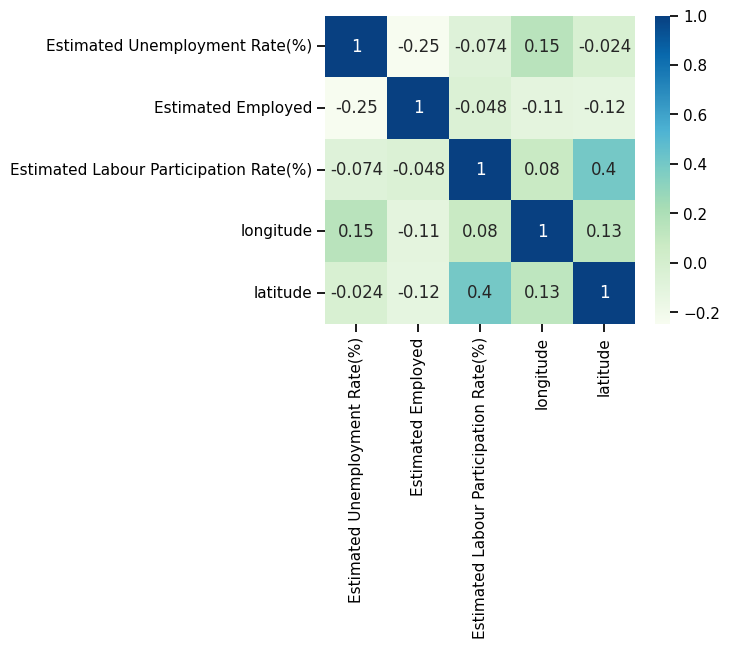

In [34]:
h_map = ds[['Estimated Unemployment Rate(%)','Estimated Employed','Estimated Labour Participation Rate(%)','longitude','latitude']]

h_map = h_map.corr()

plt.figure(figsize=(5,4))
sns.set_context('notebook',font_scale=1)
sns.heatmap(h_map, annot=True,cmap='GnBu');

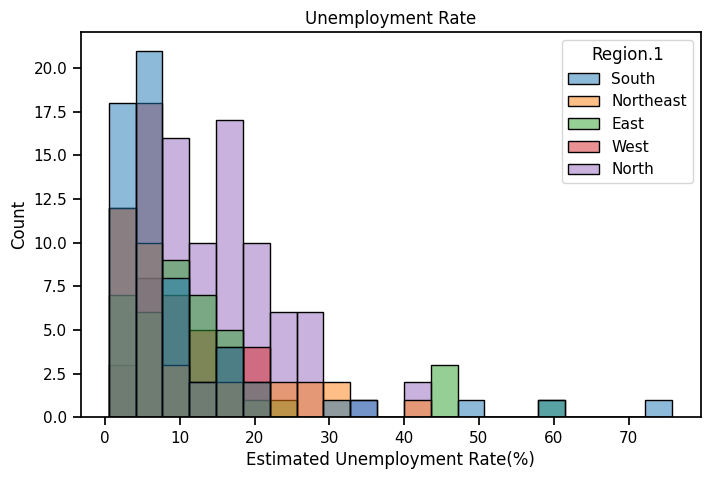

In [35]:
#unemployment rate according to different regions of India
ds.columns= ["Region","Date","Frequency","Estimated Unemployment Rate(%)","Estimated Employed","Estimated Labour Participation Rate(%)","Region.1","longitude","latitude"]

plt.figure(figsize=(8, 5))
plt.title("Unemployment Rate")
sns.histplot(x="Estimated Unemployment Rate(%)", hue="Region.1", data=ds)
plt.show()

In [36]:
import plotly.express as px
reg = ds.groupby(["Region.1"])[["Estimated Unemployment Rate(%)","Estimated Employed","Estimated Labour Participation Rate(%)"]].mean()
reg = pd.DataFrame(reg).reset_index()

fig = px.bar(reg, x="Region.1", y="Estimated Unemployment Rate(%)", color="Region.1", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()